In [3]:
import pandas as pd

In [4]:
df_balanced=pd.read_csv('../data/processed/df_balanced.csv')

In [5]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target (y)
X = df_balanced.drop(columns=['Delayed'])
y = df_balanced['Delayed']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a basic Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

# Use StratifiedShuffleSplit for splitting to ensure balanced class distribution
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluate performance on the test set
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.49      0.49      2362
           1       0.50      0.51      0.50      2361

    accuracy                           0.50      4723
   macro avg       0.50      0.50      0.50      4723
weighted avg       0.50      0.50      0.50      4723

ROC AUC: 1.0
[[1151 1211]
 [1163 1198]]


In [11]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# RandomizedSearchCV to sample a subset of the grid
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)

# Fit the random search to the data
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.2, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.2, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.2, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.2, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, max_leaf_nodes=10, min_impurity_decrease=0.2, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, max_leaf_nodes=10, min_impurity_decr

/Users/ishanporwal/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
135 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ishanporwal/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ishanporwal/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/ishanporwal/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/Users/ishanporwal/li

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 30],
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.2],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy', verbose=2)

In [12]:
# Get the best hyperparameters and best score
best_params = grid_search.best_params_ if isinstance(grid_search, GridSearchCV) else random_search.best_params_
best_score = grid_search.best_score_ if isinstance(grid_search, GridSearchCV) else random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 1.0


In [13]:
# Get the best model from grid search or random search
best_dt_model = grid_search.best_estimator_ if isinstance(grid_search, GridSearchCV) else random_search.best_estimator_

# Train the model on the entire training set
best_dt_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_final = best_dt_model.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))


Final Accuracy: 1.0


In [14]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification Report
print(classification_report(y_test, y_pred_final))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2362
           1       1.00      1.00      1.00      2361

    accuracy                           1.00      4723
   macro avg       1.00      1.00      1.00      4723
weighted avg       1.00      1.00      1.00      4723

ROC AUC: 1.0


Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


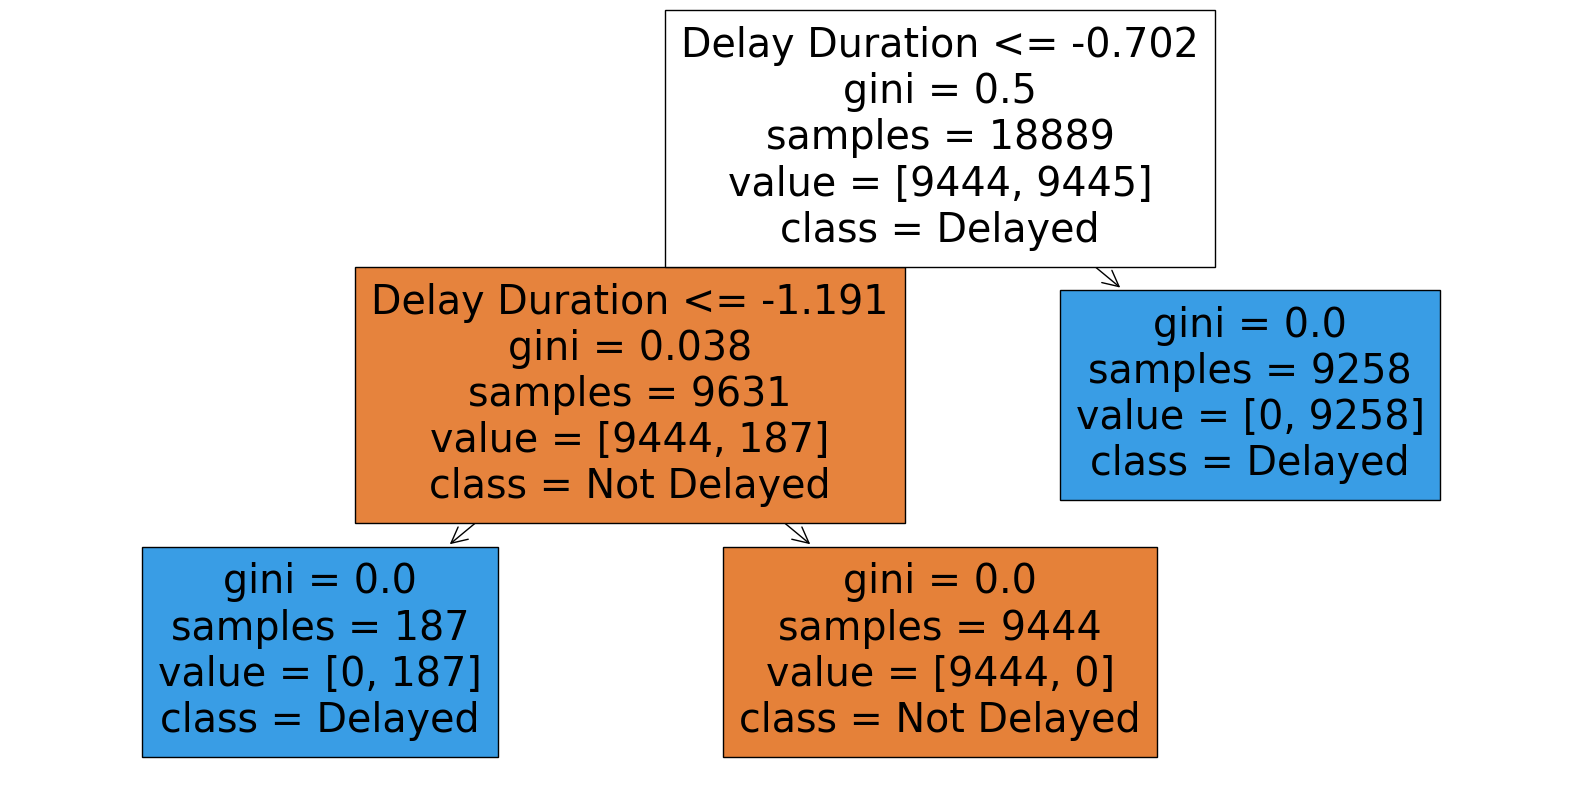

[CV] END criterion=entropy, max_depth=50, max_features=log2, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=log2, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=10; to

In [15]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Cross-validation
cv_scores = cross_val_score(best_dt_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=['Not Delayed', 'Delayed'])
plt.show()
